In [1]:
import pandas as pd #data processing
import numpy as np  #linear algebra


In [40]:
# Load Dataset
data = pd.read_csv("heart_disease.csv")

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
import plotly.express as px
from plotly.offline import iplot, plot
from plotly.subplots import make_subplots
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [41]:
#preview Data
df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,grouped_age
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0,60-69
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2,60-69
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1,60-69
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,27-39
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,40-49


In [6]:
df.shape

(920, 16)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In this dataset, the target variable is num. The predictors include age, sex, dataset, cp, trestbps, chol, fbs, restecg, thalch, exang, oldpeak, slope, ca, and thal. The id field in this dataset serves as an index. Hence, we will exclude that field. Then, we will take a look into the summary of the dataset.

Exploring The Datase


In [8]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


Here we can notice that there are some outliers that we need to deal with

In [9]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [10]:
df.duplicated().sum()

0

Cleaning The Data

First: Dealing With Null Values

In [34]:
# Numeric columns: Use median imputation
numeric_columns = ['trestbps', 'chol', 'thalch', 'oldpeak']
numeric_imputer = SimpleImputer(strategy='median')
df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])


In [35]:
# Categorical columns with mode imputation
categorical_columns = ['fbs', 'restecg', 'exang', 'slope', 'thal']
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])


In [36]:
# Checking null values
df.isnull().sum()

age            0
sex            0
dataset        0
cp             0
trestbps       0
chol           0
fbs            0
restecg        0
thalch         0
exang          0
oldpeak        0
slope          0
ca             0
thal           0
num            0
grouped_age    0
dtype: int64

In [14]:
df.shape

(920, 16)

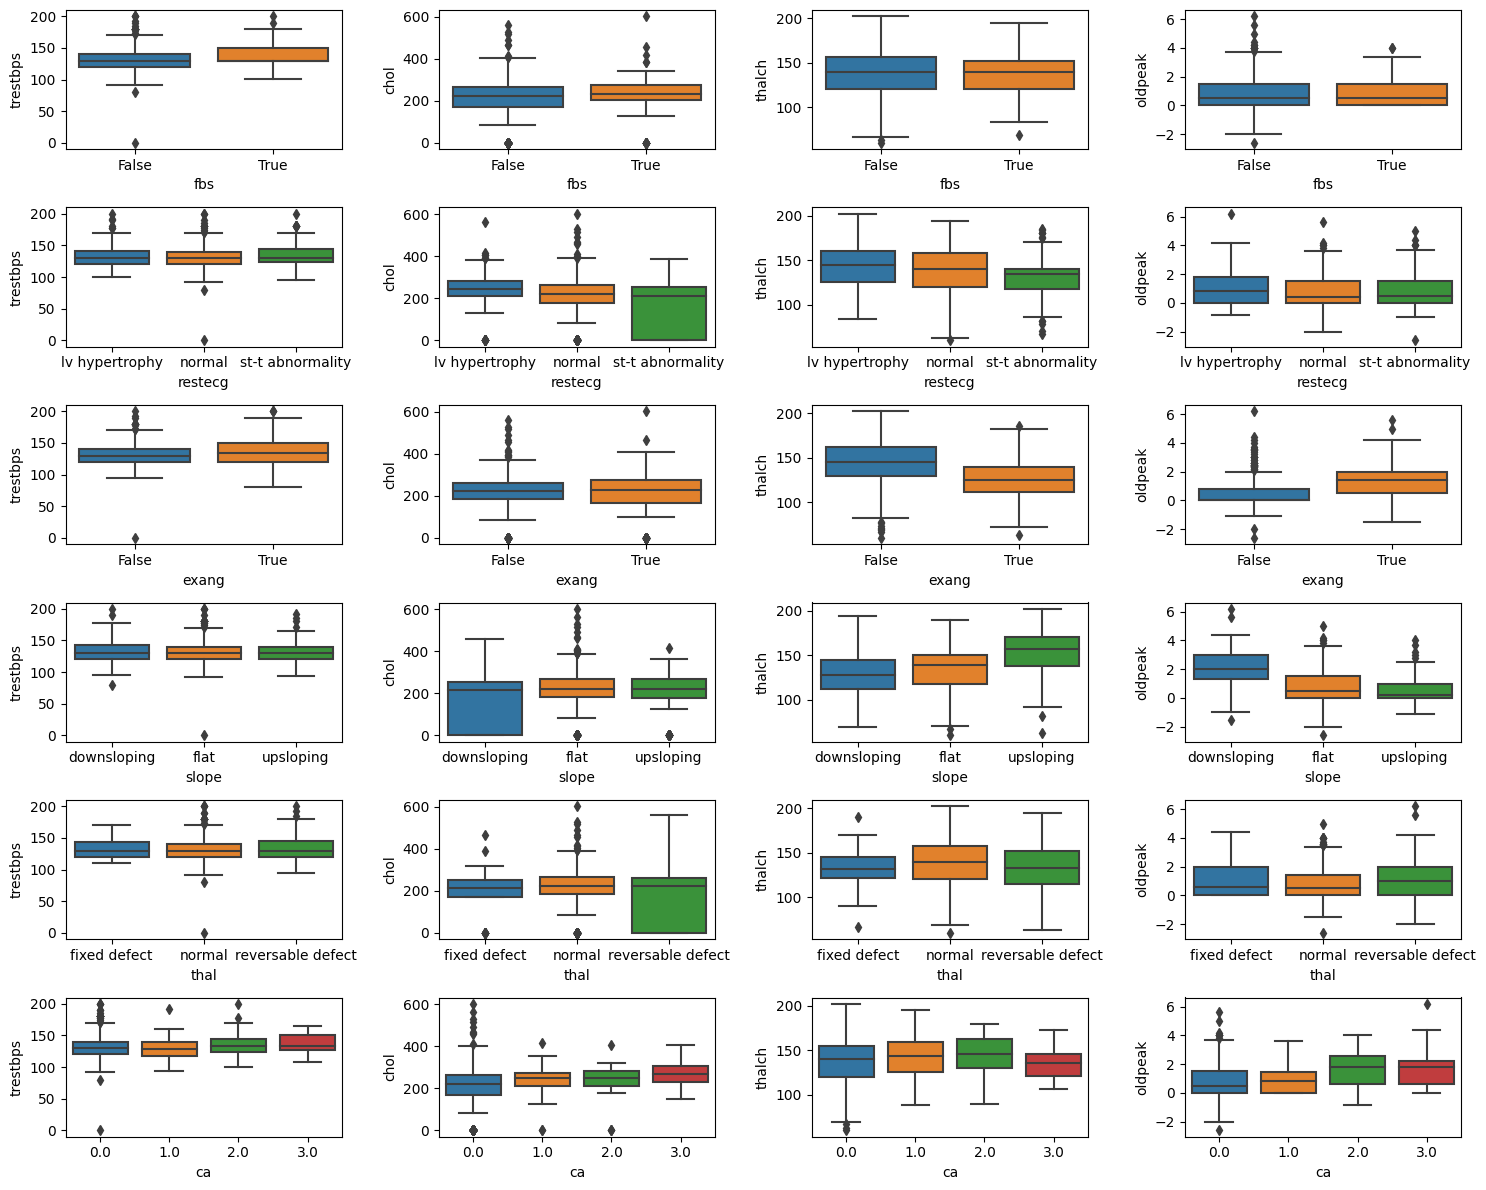

In [37]:
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=len(numeric_columns), figsize=(15, 12))
for i in range(len(categorical_columns)):
    for j in range(len(numeric_columns)):
        sns.boxplot(df, x=categorical_columns[i], y=numeric_columns[j], ax=axes[i][j])

plt.tight_layout()
plt.show()

<AxesSubplot: xlabel='num', ylabel='count'>

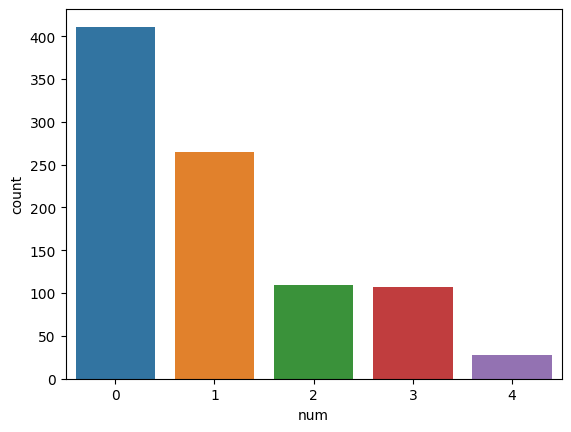

In [16]:
sns.countplot(x='num',data=df)

In [18]:
df['ca'].value_counts()

0.0    792
1.0     67
2.0     41
3.0     20
Name: ca, dtype: int64

In [20]:
age_bins = [28, 40, 50, 60, 70, 78]


In [21]:
age_labels = ["27-39", "40-49", "50-59", "60-69", "70-77"]
df['grouped_age'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

In [22]:
excluded_vars = ['age', 'grouped_age', 'sex', 'num', 'dataset', 'cp']
all_vars = df.columns
missing_value_vars = [var for var in all_vars if var not in excluded_vars]
grouped_vars = ['grouped_age', 'sex']
median_mode_impute(df, grouped_vars, missing_value_vars)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,grouped_age
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0,60-69
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2,60-69
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1,60-69
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,27-39
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,40-49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,flat,0.0,normal,1,50-59
916,917,62,Male,VA Long Beach,typical angina,130.0,139.0,False,st-t abnormality,140.0,False,0.5,flat,0.0,normal,0,60-69
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,flat,0.0,fixed defect,2,50-59
918,919,58,Male,VA Long Beach,asymptomatic,130.0,385.0,True,lv hypertrophy,140.0,False,0.5,flat,0.0,normal,0,50-59


In [23]:
df.drop('id', axis=1, inplace=True)
df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,grouped_age
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0,60-69
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2,60-69
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1,60-69
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,27-39
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,40-49


In [24]:
df.shape

(920, 16)

feature Selection

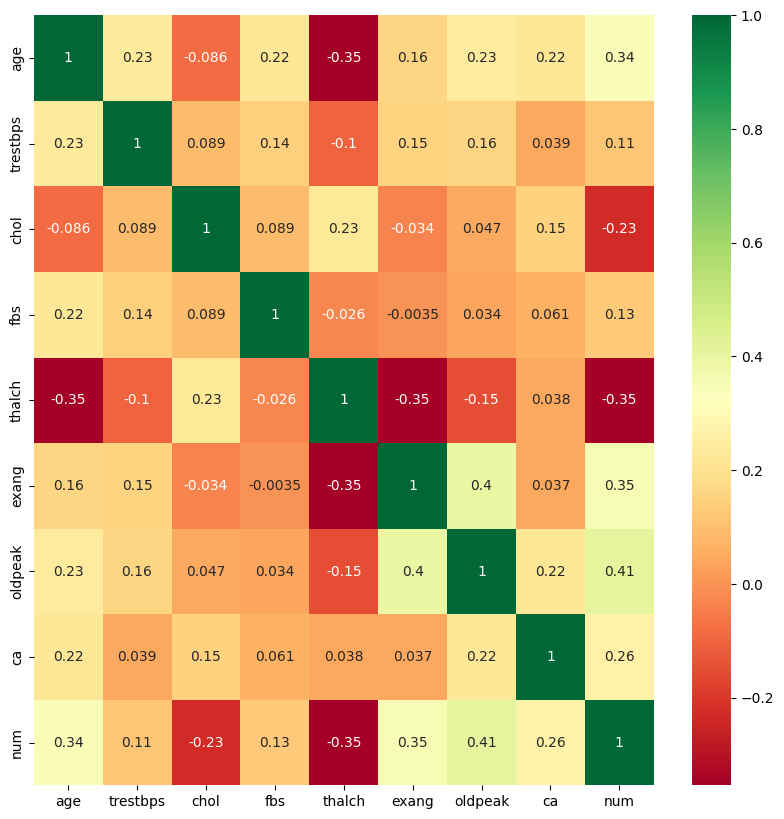

In [25]:
import seaborn as sns
#get Correlation of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

<AxesSubplot: xlabel='grouped_age', ylabel='Count'>

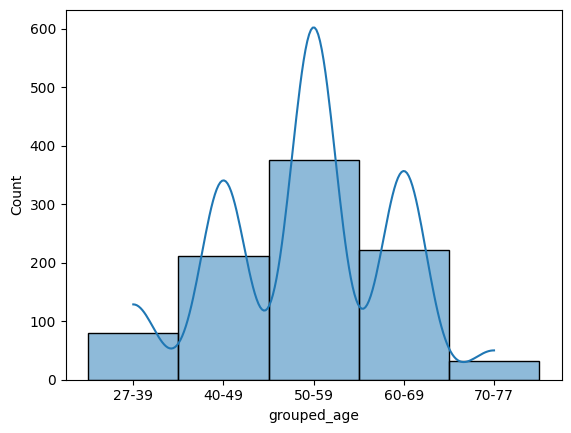

In [26]:
sns.histplot(x='grouped_age',data=df,kde=True)

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0


<AxesSubplot: xlabel='sex', ylabel='count'>

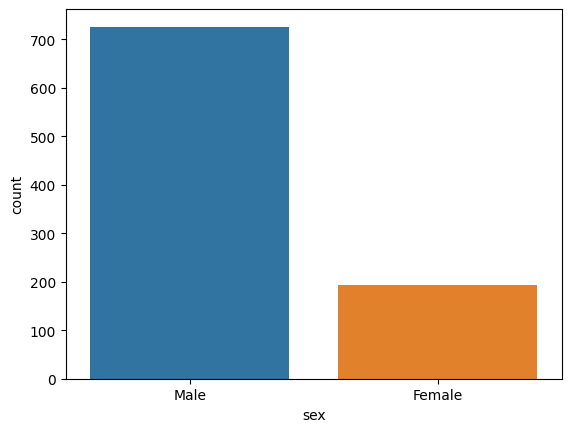

In [27]:
sns.countplot(x='sex', data=df)

<AxesSubplot: ylabel='sex'>

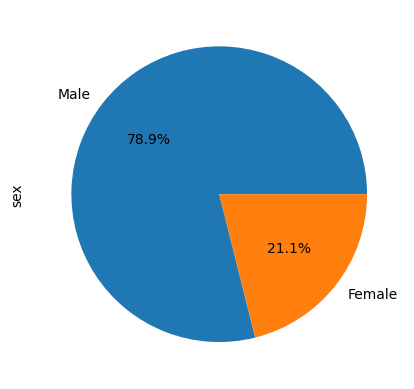

In [28]:
df.sex.value_counts().plot.pie(autopct='%0.1f%%')

<AxesSubplot: xlabel='dataset', ylabel='count'>

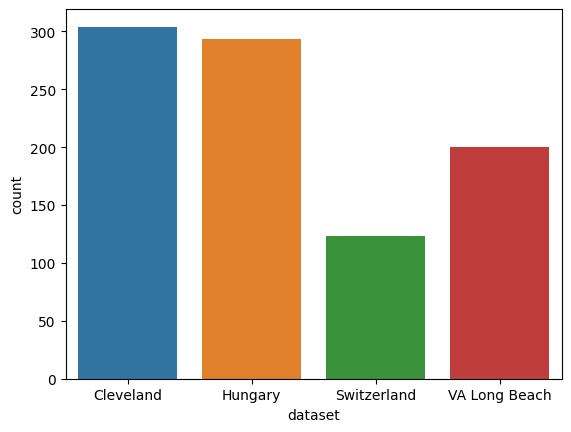

In [29]:
sns.countplot(x='sex', data=df)

<AxesSubplot: xlabel='cp', ylabel='count'>

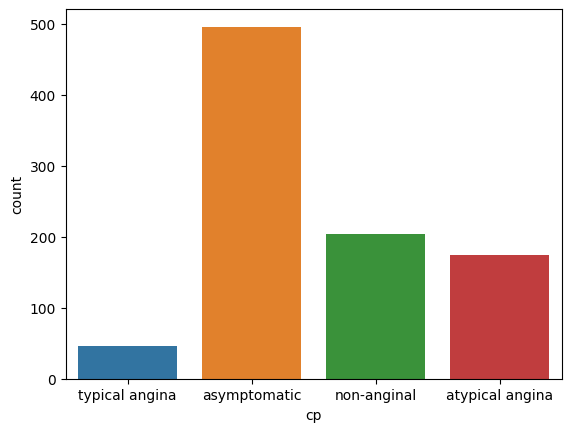

In [30]:
sns.countplot(x='cp', data=df)

In [31]:
df['cp'].value_counts()

asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: cp, dtype: int64

In [32]:
df['chol'].value_counts().sort_values(ascending=False)

0.0      172
223.0     39
220.0     10
254.0     10
230.0      9
        ... 
458.0      1
384.0      1
349.0      1
491.0      1
385.0      1
Name: chol, Length: 217, dtype: int64

<AxesSubplot: xlabel='fbs', ylabel='count'>

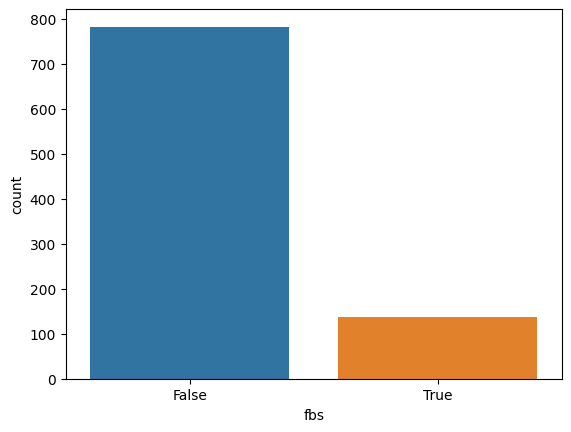

In [33]:
sns.countplot(x='fbs', data=df)